In [41]:
import pandas as pd
from plotnine import *

In [42]:
st2 = pd.read_csv("wib_st2/mixing_proportions.txt", sep="\t")

In [43]:
st2.rename(columns={'archeo_sediment':'Archeological sediment',
                    'non_westernized_humans':'Non-industrialized humans',
                    'westernized_humans':'Industrialized humans'
                   }, inplace=True)

In [44]:
st2 = st2.melt(id_vars='#SampleID', var_name='source')

In [45]:
st2['source'] = st2['source'].str.replace("_"," ")

In [46]:
st2['source'] = pd.Categorical(st2['source'])

In [47]:
st2['source'] = st2['source'].cat.reorder_categories(['Archeological sediment','Non-industrialized humans','Industrialized humans','Unknown'])

/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:720: PlotnineWarning: Filename: sourcetracker2_sources.png
  warn('Filename: {}'.format(filename), PlotnineWarning)
/projects1/users/borry/15_miniconda3/lib/python3.7/site-packages/plotnine/ggplot.py:735: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  fig.savefig(filename, **fig_kwargs)


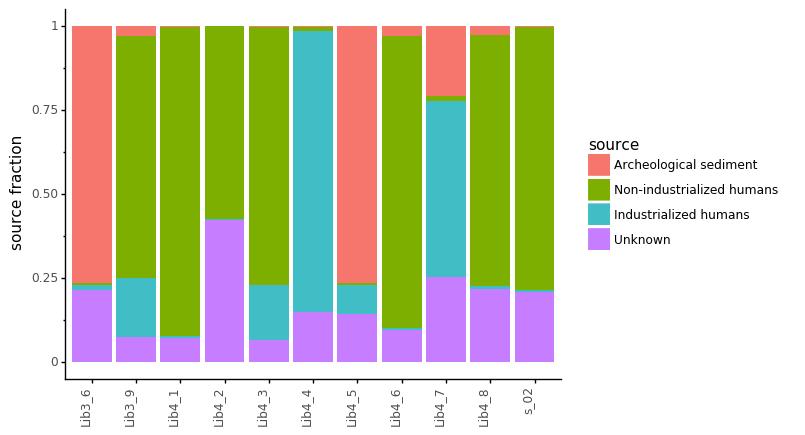

<ggplot: (-9223363286359535847)>

In [48]:
g = ggplot(st2, aes(x='#SampleID',y='value')) 
g += geom_bar(aes(fill='source'), position='fill', stat='identity')
g += theme_classic()
g += theme(axis_text_x = element_text(angle = 90, hjust = 1))
g += labs(y="source fraction",x="")
g += scale_fill_manual(values = {'Archeological sediment':'#F6766D',
                                 'Non-industrialized humans':'#7DAF00',
                                 'Industrialized humans':'#40BDC5',
                                 'Unknown':'#C77DFF'})
g.save("sourcetracker2_sources.png", dpi=300)
g